<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista2_Simula%C3%A7%C3%A3oEstoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1ª Questão Letra A:

In [18]:
%pip install simpy

In [19]:
import numpy as np
import simpy

In [20]:

class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def media_fila(self, lista):
      return sum(lista)/len(lista)

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Tamanho Médio da fila = {self.media_fila(self.vetor_n)}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, Tamanho da fila = {self.tamanho_da_fila}, Tamanho Médio da fila = {self.media_fila(self.vetor_n)}")



def gera_chegadas(env, fila_mm1):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 1.3708155405039857, tamanho da fila = 1, Tamanho Médio da fila = 1.0
Cliente 2 chegou à fila em 1.3859847953914946, tamanho da fila = 2, Tamanho Médio da fila = 1.5
Cliente 3 chegou à fila em 1.4210891322394268, tamanho da fila = 3, Tamanho Médio da fila = 2.0
Cliente 4 chegou à fila em 2.498870660569194, tamanho da fila = 4, Tamanho Médio da fila = 2.5
Cliente 1 saiu em 2.8148268279651907, Tamanho da fila = 3, Tamanho Médio da fila = 2.6
Cliente 2 saiu em 2.8739696755692017, Tamanho da fila = 2, Tamanho Médio da fila = 2.5
Cliente 3 saiu em 2.936472658080211, Tamanho da fila = 1, Tamanho Médio da fila = 2.2857142857142856
Cliente 4 saiu em 3.0716189589063307, Tamanho da fila = 0, Tamanho Médio da fila = 2.0
Cliente 5 chegou à fila em 3.1308705963751056, tamanho da fila = 1, Tamanho Médio da fila = 1.8888888888888888
Cliente 6 chegou à fila em 3.3009443527969378, tamanho da fila = 2, Tamanho Médio da fila = 1.9
Cliente 7 chegou à fila em 3.3450987001385815, t

#1ª Questão Letra B:

In [21]:
import simpy
import random
global i
i = 0
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []
        self.erro = 1

    def media_fila(self, lista):
      return sum(lista)/len(lista)

    def chegada_cliente(self, cliente):
        global i
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila},erro = {self.erro}, iteração = {i}")
        tam_medio_inicial = self.media_fila(self.vetor_n)
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            i = i + 1
            tam_medio_final = self.media_fila(self.vetor_n)
            self.erro = abs(tam_medio_final - tam_medio_inicial)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, erro = {self.erro},iteração = {i}")

def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        if (fila_mm1.erro <= 0.0004): break # Critério de convergência
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=100)


Cliente 1 chegou à fila em 0.3463734637549485, tamanho da fila = 1,erro = 1, iteração = 1
Cliente 2 chegou à fila em 0.3807448806719728, tamanho da fila = 2,erro = 1, iteração = 2
Cliente 1 saiu em 0.6721148272178813, tamanho da fila = 1, erro = 0.33333333333333326,iteração = 3
Cliente 2 saiu em 0.843197235089776, tamanho da fila = 0, erro = 0.5,iteração = 4
Cliente 3 chegou à fila em 0.9108559873383064, tamanho da fila = 1,erro = 0.5, iteração = 5
Cliente 4 chegou à fila em 1.1871906364934526, tamanho da fila = 2,erro = 0.5, iteração = 6
Cliente 5 chegou à fila em 1.2637465203958897, tamanho da fila = 3,erro = 0.5, iteração = 7
Cliente 3 saiu em 1.7353398001045814, tamanho da fila = 2, erro = 0.5,iteração = 8
Cliente 4 saiu em 1.8335649066334305, tamanho da fila = 1, erro = 0.2777777777777777,iteração = 9
Cliente 5 saiu em 1.9349123835200628, tamanho da fila = 0, erro = 0.12857142857142856,iteração = 10
Cliente 6 chegou à fila em 2.236477178929599, tamanho da fila = 1,erro = 0.1285714

#2ª Questão Letra A:

In [22]:

class FilaMMC:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMC(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)
vetor_n = fila.vetor_n
vetor_a = fila.vetor_a

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.503201788474316, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.8109130843211003, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.9257403459188109, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 2.1374715394253396, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 2.1397522976536933, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 saiu em 2.240557871720835, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 3.8458994049705986, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 3.9159671310736557, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 4.4384880267810845, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 saiu em 4.579302161107266, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 5.0931305301417025, tamanho da fila = 1, Pessoas em atendimento = 0
Cli

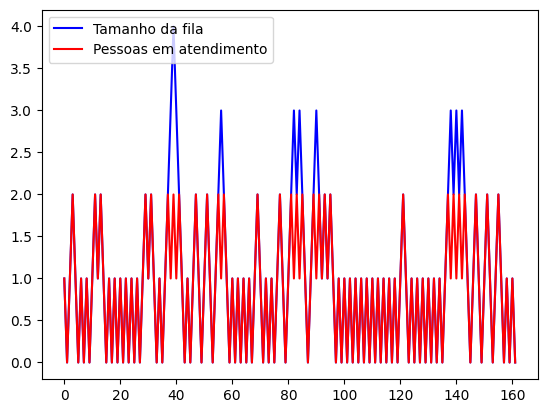

In [23]:
# Plot do tamanho da fila e a quantidade de pessoas em atendimento
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(vetor_n))]
aux.plot(eixo_x, vetor_n, color = 'blue', label = 'Tamanho da fila')
aux.legend(loc='upper left')
aux.plot(eixo_x, vetor_a, color = 'red', label = 'Pessoas em atendimento')
aux.legend(loc='upper left')
plt.show()

# 2ª Questão Letra B:

In [24]:
vetor = []

In [25]:

class FilaMMCB:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.taxa_de_uti = 0
        self.tempo_total_do_sistema = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        self.tempo_total_do_sistema.append(self.env.now)
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            tempo_inicial = self.env.now
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            tempo_final = self.env.now
            self.taxa_de_uti = self.taxa_de_uti + (tempo_final - tempo_inicial)
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}, tempo de atendimento = {tempo_final - tempo_inicial}")
            self.tempo_total_do_sistema.append(self.env.now)

def gera_chegadas(env, fila_mmc):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmc.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mmc.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')

Cliente 1 chegou à fila em 0.24432175715162868, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.28012092939991906, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 0.30050625814493764, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.020385328745018583
Cliente 1 saiu em 0.36617706962732266, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.12185531247569398
Cliente 3 chegou à fila em 1.7622168887291512, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 saiu em 1.924909037591416, tamanho da fila = 0, Pessoas em atendimento = 0, tempo de atendimento = 0.1626921488622648
Cliente 4 chegou à fila em 2.006536542710305, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 2.0384270975813137, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 2.1977790950993006, tamanho da fila = 1, Pessoas em atendimento = 1, tempo de atendimento = 0.1593519975179869
Clie

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 1**

In [26]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=1, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.2754298308083855, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.4583600490898227, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.4782670633880209, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 4 chegou à fila em 0.7514994208971777, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.8266516364563041, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 6 chegou à fila em 1.0032554399607378, tamanho da fila = 6, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 1.2958879787197575, tamanho da fila = 7, Pessoas em atendimento = 2
Cliente 8 chegou à fila em 1.3473442713883037, tamanho da fila = 8, Pessoas em atendimento = 2
Cliente 2 saiu em 1.4106367198090353, tamanho da fila = 7, Pessoas em atendimento = 1, tempo de atendimento = 0.9522766707192125
Cliente 9 chegou à fila em 1.4596637905947298, tamanho da fila = 8, Pessoas em atendimento = 2
Cliente 10 chego

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 2**

In [27]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=2, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.022633850773622153, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.06925952473629762, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.16814353722515707, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 4 chegou à fila em 0.42716396294831405, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.46942390498072, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 6 chegou à fila em 0.6643836346649046, tamanho da fila = 6, Pessoas em atendimento = 2
Cliente 2 saiu em 0.7434842352861838, tamanho da fila = 5, Pessoas em atendimento = 1, tempo de atendimento = 0.6742247105498862
Cliente 1 saiu em 0.7616994620364317, tamanho da fila = 4, Pessoas em atendimento = 1, tempo de atendimento = 0.7390656112628096
Cliente 7 chegou à fila em 1.0102924078510138, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 8 chegou à fila em 1.0441847929960608, tamanho da fila = 6, Pessoa

**Taxa de utilização para taxa de chegada = 5 e taxa de serviço = 3**

In [28]:
c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMMCB(env, taxa_chegada=5, taxa_servico=3, num_servidores = c)

env.process(gera_chegadas(env, fila))

env.run(until=50)
tempo_u = fila.taxa_de_uti/c
print(f'Taxa de utilização = {(100*tempo_u)/fila.tempo_total_do_sistema[-1]}%')
vetor.append((100*tempo_u)/fila.tempo_total_do_sistema[-1])

Cliente 1 chegou à fila em 0.19623633934059556, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.4221418144951248, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 chegou à fila em 0.44832403639043195, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 4 chegou à fila em 0.5878304580713933, tamanho da fila = 4, Pessoas em atendimento = 2
Cliente 5 chegou à fila em 0.6179391927710021, tamanho da fila = 5, Pessoas em atendimento = 2
Cliente 2 saiu em 0.6555762850784939, tamanho da fila = 4, Pessoas em atendimento = 1, tempo de atendimento = 0.23343447058336908
Cliente 3 saiu em 0.7135152665772893, tamanho da fila = 3, Pessoas em atendimento = 1, tempo de atendimento = 0.057938981498795394
Cliente 1 saiu em 0.720424699214791, tamanho da fila = 2, Pessoas em atendimento = 1, tempo de atendimento = 0.5241883598741954
Cliente 6 chegou à fila em 0.8148510013445306, tamanho da fila = 3, Pessoas em atendimento = 2
Cliente 7 chegou à fila em 0.9276253014

**Comparação**

In [29]:
print(f'Em todos os casos analisados definimos o número de atendentes = 2')
print(f'taxa de utilização = {vetor[0]}% para taxa de chegada = 5 e taxa de atendimento = 1')
print(f'taxa de utilização = {vetor[1]}% para taxa de chegada = 5 e taxa de atendimento = 2')
print(f'taxa de utilização = {vetor[2]}% para taxa de chegada = 5 e taxa de atendimento = 3')

Em todos os casos analisados definimos o número de atendentes = 2
taxa de utilização = 96.92332845037909% para taxa de chegada = 5 e taxa de atendimento = 1
taxa de utilização = 99.73496950913149% para taxa de chegada = 5 e taxa de atendimento = 2
taxa de utilização = 80.53924679451508% para taxa de chegada = 5 e taxa de atendimento = 3


#3ª Questão

In [30]:
# Fila implementada para termos dois tipos de clientes(normal e prioritário)
class FilaMM1:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0

    def chegada_cliente(self, cliente, prio, tipo_cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        if tipo_cliente == 'P':
          print(f"Cliente {cliente}(Prioritário) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        else:
          print(f"Cliente {cliente}(Normal) chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")


def gera_chegadas(env, fila_mm1):
    cliente = 0
    prio = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        tipo_cliente = np.random.choice(['N', 'P']) # Define se o cliente é normal ou prioritário
        if tipo_cliente == 'P':
            prio = prio + 1
            env.process(fila_mm1.chegada_cliente(cliente, prio, tipo_cliente))
        else:
            env.process(fila_mm1.chegada_cliente(cliente, 1000000000000, tipo_cliente))


env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)
fila = FilaMM1(env, res, taxa_chegada=7, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1(Prioritário) chegou à fila em 0.001360873932710953, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2(Normal) chegou à fila em 0.025767500520681365, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3(Prioritário) chegou à fila em 0.10632638450655674, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 1 saiu em 0.14224414262167637, tamanho da fila = 2
Cliente 3 saiu em 0.26354791055807847, tamanho da fila = 1
Cliente 4(Normal) chegou à fila em 0.3513676455467649, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5(Prioritário) chegou à fila em 0.36432294341831567, tamanho da fila = 3, Pessoas em atendimento = 1
Cliente 6(Prioritário) chegou à fila em 0.42432118947002123, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 2 saiu em 0.4393188234255458, tamanho da fila = 3
Cliente 7(Normal) chegou à fila em 0.7099114178989872, tamanho da fila = 4, Pessoas em atendimento = 1
Cliente 8(Normal) chegou à fila em 1.1120107332835212, tamanho da fila = 5, 

#4ª Questão Letra A:

In [31]:
# Sistema implemntado para temos um limite de 10 pessoas.
class FilaMM1K:
    def __init__(self, env, res, taxa_chegada, taxa_servico):
        self.env = env
        self.res = res
        self.servidor = simpy.PriorityResource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")


def gera_chegadas(env, fila_mm1k, limite_sistema):
    cliente = 0
    limite = limite_sistema
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1k.taxa_chegada))
        cliente += 1
        if (fila_mm1k.tamanho_da_fila + fila.qtd_atendimento) >= limite_sistema: # Quantidade de pessoas que estão na fila mais a quantidade de pessoas que estão em atendimento
          print(f'O sistema está lotado e o cliente {cliente} foi rejeitado!!!!!!!!!!!!!!!!!')
        else:
          env.process(fila_mm1k.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1K(env, res, taxa_chegada=3, taxa_servico=3)
limite_sistema = 10 # Variável que define a quantidade máxima de pessoas que podem está no nosso sistema
env.process(gera_chegadas(env, fila, limite_sistema))

env.run(until=100)


Cliente 1 chegou à fila em 0.7651167775346277, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.834752766057103, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 1.44153782115432, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 saiu em 1.6413795289880906, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 1.7538861618693615, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 1.7625714600364117, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 3 saiu em 1.7839427605520042, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 1.9382841718504624, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 4 saiu em 1.9921498526477708, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 2.3771668368003804, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 2.4779897859919364, tamanho da fila = 1, Pessoas em atendimento = 0
Cli

#4ª Questão Letra B:

Resposta: Como é possível calcular o valor de pessoas esperadas no sistema, então é possível deduzir um valor teórico para o número médio de rejeições no sistema

# 5ª Questão

In [32]:
# Fila MMC modificada para atender um cliente aleatório que está fila
class FilaMMCA:
    def __init__(self, env, res, c, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.PriorityResource(env, capacity=c)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente, prio):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request(priority=prio) as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mmca):
    cliente = 0
    while True:
        yield env.timeout(np.random.exponential(1/fila_mmca.taxa_chegada))
        cliente += 1
        prio = random.randint(0, 1000000000000000000000) # Definimos a prioridade de um cliente com um número inteiro aleatório
        env.process(fila_mmca.chegada_cliente(cliente, prio))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=c)
fila = FilaMMCA(env, res, c, taxa_chegada=2, taxa_servico=3)


env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.15846803684385058, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.4832188996080814, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 3.9641468217750266, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 4.043103825092389, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 2 saiu em 4.140431003177343, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 3 saiu em 4.745425743369667, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 5.016587851370361, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 5.862491296236152, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 4 saiu em 5.891067613567954, tamanho da fila = 1, Pessoas em atendimento = 1
Cliente 6 chegou à fila em 5.914714493314895, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 6 saiu em 6.0109554070206395, tamanho da fila = 1, Pessoas em atendimento = 1
Client